In [121]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from deuces import Evaluator
from generate_hands import prettify_row

In [122]:
hands_df = pd.read_csv('data/hands.csv')
evaluator = Evaluator()

In [123]:
hands_df.transform(lambda row: prettify_row(row, evaluator), axis=1)

,hole1,hole2,flop1,flop2,flop3,turn,river,flop_eval,turn_eval,river_eval
0,5h,Qc,5c,4h,8h,Kd,2h,Pair,Pair,Pair
1,8d,3c,Qc,4c,6d,7h,3d,High Card,High Card,Pair
2,Ad,9s,3h,5h,Jh,8s,7d,High Card,High Card,High Card
3,9d,9h,Qh,7d,Jc,5s,8c,Pair,Pair,Pair
4,Th,4d,Qs,6c,2d,4h,7s,High Card,Pair,Pair
...,...,...,...,...,...,...,...,...,...,...
99985,Jh,8c,6c,Ts,5c,Jd,6h,High Card,Pair,Two Pair
99986,Td,Ac,9d,Tc,9c,Ad,Jh,Two Pair,Two Pair,Two Pair
99987,Jd,Ks,5c,Th,Qd,7d,4s,High Card,High Card,High Card
99988,Jc,7c,4d,Kd,Tc,8c,Kc,High Card,High Card,Flush


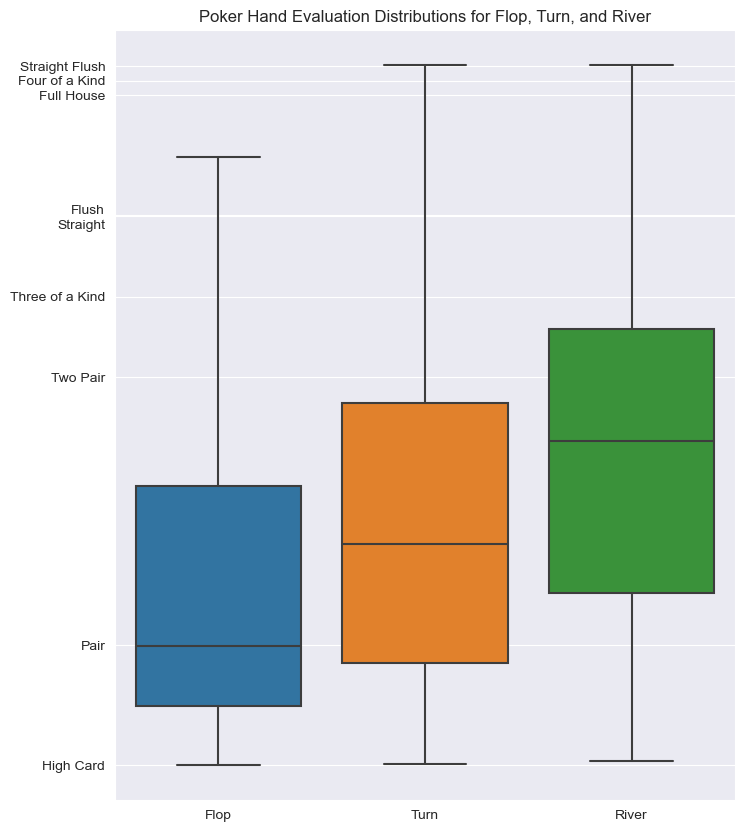

In [124]:
# lookup table from github documentation
    # MAX_STRAIGHT_FLUSH  = 10
    # MAX_FOUR_OF_A_KIND  = 166
    # MAX_FULL_HOUSE      = 322 
    # MAX_FLUSH           = 1599
    # MAX_STRAIGHT        = 1609
    # MAX_THREE_OF_A_KIND = 2467
    # MAX_TWO_PAIR        = 3325
    # MAX_PAIR            = 6185
    # MAX_HIGH_CARD       = 7462
plt.figure(figsize=(8,10))
sns.boxplot(
    data=hands_df[['flop_eval','turn_eval','river_eval']],
    showfliers=False,
)
plt.title("Poker Hand Evaluation Distributions for Flop, Turn, and River")
plt.xticks(ticks=[0,1,2], labels=['Flop', 'Turn', 'River'])
plt.yticks(ticks=[10, 166, 322, 1599, 1609, 2467, 3325, 6185, 7462], labels=["Straight Flush", "Four of a Kind", "Full House", "Flush\n", "\nStraight", "Three of a Kind", "Two Pair", "Pair", "High Card"])
plt.gca().invert_yaxis()
plt.show()

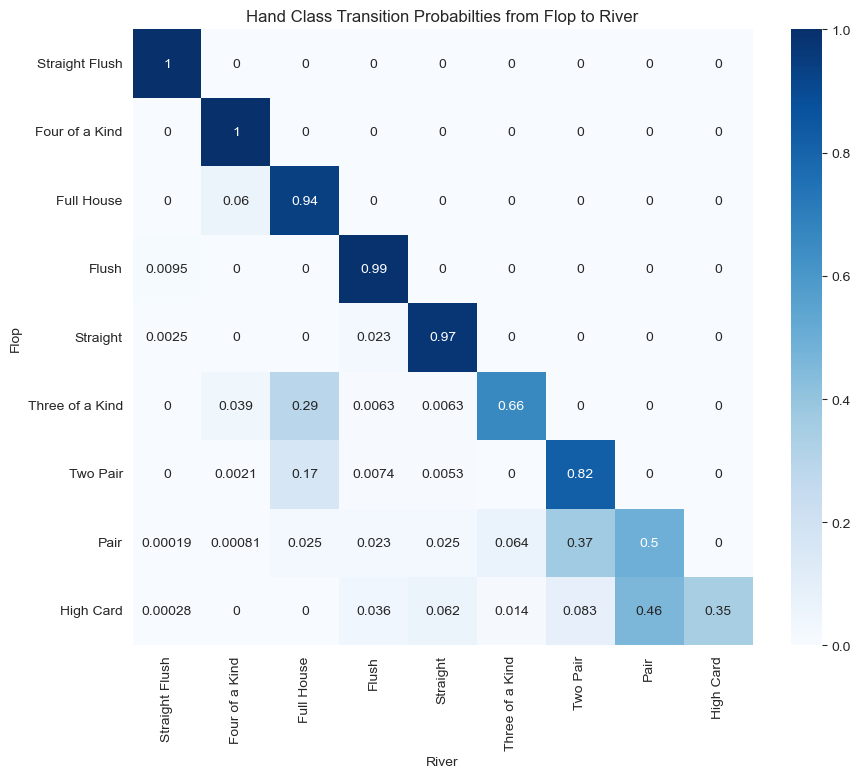

In [125]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(
    data=pd.crosstab(
        hands_df['flop_eval'].map(evaluator.get_rank_class), 
        hands_df['river_eval'].map(evaluator.get_rank_class),
        normalize='index'
    ),
    cmap="Blues",
    annot=True,
)
plt.xlabel("River")
plt.ylabel("Flop")
ax.set_yticklabels([evaluator.class_to_string(label) for label in range(1,10)], rotation=0)
ax.set_xticklabels([evaluator.class_to_string(label) for label in range(1,10)], rotation=90)
plt.title("Hand Class Transition Probabilities from Flop to River")
plt.show()

In [117]:
hole_cards_df = hands_df.groupby(["hole1","hole2"]).median().astype(int).reset_index()

best_flop = hole_cards_df.iloc[hole_cards_df['flop_eval'].idxmin()]
best_turn = hole_cards_df.iloc[hole_cards_df['turn_eval'].idxmin()]
best_river = hole_cards_df.iloc[hole_cards_df['river_eval'].idxmin()]

In [118]:
prettify_row(best_flop, evaluator)

['Jd', 'Js', '8s', '9h', '6d', '8d', '7d', 'Two Pair', 'Two Pair', 'Two Pair']

In [119]:
prettify_row(best_turn, evaluator)

['Ah', 'Ac', '7d', '8d', '9c', '8h', '8h', 'Pair', 'Two Pair', 'Two Pair']

In [120]:
prettify_row(best_river, evaluator)

['As', 'Ad', '7s', '8h', '9d', '8h', '9h', 'Pair', 'Two Pair', 'Two Pair']